In [0]:
import pandas as pd
import numpy as np

In [0]:
df_cluster = pd.read_csv("df_cluster0.csv")

In [3]:
df_cluster.head()

,Unnamed: 0,Patient,Cluster Class,mean_nni_mean,mean_nni_std,sdnn_mean,sdnn_std,sdsd_mean,sdsd_std,nni_50_mean,nni_50_std,pnni_50_mean,pnni_50_std,nni_20_mean,nni_20_std,pnni_20_mean,pnni_20_std,rmssd_mean,rmssd_std,median_nni_mean,median_nni_std,range_nni_mean,range_nni_std,cvsd_mean,cvsd_std,cvnni_mean,cvnni_std,mean_hr_mean,mean_hr_std,max_hr_mean,max_hr_std,min_hr_mean,min_hr_std,std_hr_mean,std_hr_std,lf_mean,lf_std,hf_mean,hf_std,vlf_mean,vlf_std,lf_hf_ratio_mean,lf_hf_ratio_std,csi_mean,csi_std,cvi_mean,cvi_std,Modified_csi_mean,Modified_csi_std,sampen_mean,sampen_std,sd1_mean,sd1_std,sd2_mean,sd2_std,ratio_sd2_sd1_mean,ratio_sd2_sd1_std,crisis_frequency
0,3,32,0,993.491279,143.036646,67.479057,44.442820,46.719408,24.761886,2.146341,1.496898,21.301321,14.736327,3.634146,1.695067,35.765443,15.785104,48.976662,25.405881,996.224490,150.825736,185.178862,114.874346,0.050820,0.028110,0.071014,0.050939,62.081716,8.840301,70.224919,13.295390,57.023263,7.117771,4.638969,4.113357,3538.150468,1796.524085,464.979305,299.630733,1832.277570,1082.629033,8.364500,2.380916,3.676932,0.983092,4.830773,0.241424,2046.067838,1238.109027,0.654497,0.241155,35.572919,9.171042,130.733513,48.349234,3.676932,0.983092,0.008130
1,7,143,0,606.007012,48.776505,74.384519,32.343460,42.379348,16.949215,2.687500,1.504586,17.069588,9.764880,5.437500,1.817457,34.338965,11.505464,43.364052,16.782507,597.976471,55.956824,206.093750,82.157467,0.071055,0.024499,0.121453,0.047785,101.185268,7.599264,121.459214,8.534326,86.349629,8.949656,11.726594,4.195277,4133.635896,1201.358465,1122.681805,239.719040,1329.409623,562.282734,3.841856,1.383608,3.754517,0.569744,4.744259,0.123419,1752.991788,493.984605,0.654497,0.241155,30.891091,4.574532,115.138570,19.646281,3.754517,0.569744,0.000000
2,69,1169,0,386.200000,349.579347,76.090607,90.658784,68.876337,72.559291,1.818182,1.834022,20.827321,24.903835,2.636364,2.157440,27.128427,24.282104,69.599403,73.693567,410.666667,377.308009,335.348148,379.440761,0.172689,0.060632,0.183820,0.106361,85.528071,6.647574,91.822446,10.974014,83.036435,6.781959,21.594394,13.520871,794.726781,727.346139,189.410950,243.546072,480.269306,438.445483,9.905283,6.839494,4.891838,2.076804,3.500706,0.428816,953.774959,894.083625,0.654497,0.241155,11.128971,6.479228,46.064760,28.019346,4.891838,2.076804,0.000000
3,80,1357,0,590.343588,34.813506,42.929517,35.701622,29.275761,22.445080,1.768595,1.838298,9.954440,10.260749,2.652893,2.451907,14.905873,13.326106,29.560662,22.600215,583.807292,30.488598,130.426997,122.872022,0.050124,0.038170,0.074004,0.064218,103.062998,7.783248,117.950837,26.678339,92.074832,10.626732,7.973935,8.068424,1596.882821,992.897017,745.525361,432.979379,546.592836,450.549378,2.188143,1.046740,3.007840,0.671256,4.438808,0.414843,997.736002,559.787628,0.654497,0.241155,26.005005,8.357969,78.625325,30.014265,3.007840,0.671256,0.793388
4,103,1843,0,929.095695,177.351800,63.092366,55.368342,36.336784,27.652963,1.694656,1.709220,14.593148,13.929949,3.312977,2.034638,29.232892,16.139685,38.883871,29.088956,938.115044,181.285772,195.172392,166.834523,0.043453,0.035064,0.072148,0.068876,85.528071,6.647574,91.822446,10.974014,83.036435,6.781959,5.461520,7.011622,4777.402823,4957.150267,948.503154,2187.978034,2583.827297,2614.018856,9.220812,2.554778,4.795542,1.586899,4.801216,0.349480,3213.125316,2784.733467,0.654497,0.241155,31.597188,13.159769,151.237804,78.807303,4.795542,1.586899,0.037037


In [0]:
s = pd.Series(df_cluster['Patient'])

In [5]:
s

0        32
1       143
2      1169
3      1357
4      1843
      ...  
59    12262
60    12957
61    12966
62    13182
63    13407
Name: Patient, Length: 64, dtype: int64

In [0]:
l_1 = s.values.tolist()

In [7]:
l_1

[32,
 143,
 1169,
 1357,
 1843,
 1984,
 2232,
 2297,
 2614,
 2796,
 2807,
 3546,
 3849,
 4087,
 4208,
 5323,
 5347,
 5426,
 5554,
 5740,
 5804,
 6107,
 6236,
 6351,
 6482,
 6563,
 6904,
 7038,
 7095,
 7910,
 8100,
 8345,
 8479,
 8512,
 8616,
 8643,
 8829,
 8835,
 9044,
 9050,
 9097,
 9347,
 9694,
 9854,
 9880,
 10020,
 10062,
 10201,
 10480,
 10551,
 10584,
 10639,
 11081,
 11379,
 11454,
 11927,
 11974,
 12218,
 12229,
 12262,
 12957,
 12966,
 13182,
 13407]

In [0]:
df_label = pd.read_csv('xqrs_v2_cleaned.csv')

In [9]:
df_label.head()

,Unnamed: 0,Set,Categorie Montage,Dossier Patient,Patient,Session,File N°,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label,cle_exam,max_duration,mean_nni%,csi%,hf%
0,193,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300.0,0.977827,0.795613,0.0,0.0,665.457589,1.942364,1.532157,0.0,0.0,0.0,0.000000,1.532157,664.06250,3.90625,0.002302,0.002919,90.164234,90.352941,89.824561,0.253177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
1,194,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300.0,0.977827,0.795613,1.0,10000.0,672.135417,11.762073,11.504201,0.0,0.0,1.0,6.666667,11.718750,675.78125,46.87500,0.017435,0.017500,89.294479,94.814815,88.275862,1.582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
2,195,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300.0,0.977827,0.795613,2.0,20000.0,657.031250,10.460751,9.002380,0.0,0.0,1.0,6.666667,9.511195,660.15625,42.96875,0.014476,0.015921,91.342484,96.603774,90.352941,1.471285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
3,196,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300.0,0.977827,0.795613,3.0,30000.0,660.677083,2.499767,1.786586,0.0,0.0,0.0,0.000000,1.808242,660.15625,7.81250,0.002737,0.003784,90.817138,91.428571,90.352941,0.332091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
4,197,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300.0,0.977827,0.795613,4.0,40000.0,663.330078,6.723404,2.240189,0.0,0.0,0.0,0.000000,2.470529,664.06250,15.62500,0.003724,0.010136,90.461400,91.428571,89.302326,0.885948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667


In [0]:
df_label_work = df_label[df_label['Patient'].isin(l_1)]

In [11]:
df_label_work

,Unnamed: 0,Set,Categorie Montage,Dossier Patient,Patient,Session,File N°,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label,cle_exam,max_duration,mean_nni%,csi%,hf%
0,193,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300.0,0.977827,0.795613,0.0,0.0,665.457589,1.942364,1.532157,0.0,0.0,0.0,0.000000,1.532157,664.06250,3.90625,0.002302,0.002919,90.164234,90.352941,89.824561,0.253177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
1,194,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300.0,0.977827,0.795613,1.0,10000.0,672.135417,11.762073,11.504201,0.0,0.0,1.0,6.666667,11.718750,675.78125,46.87500,0.017435,0.017500,89.294479,94.814815,88.275862,1.582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
2,195,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300.0,0.977827,0.795613,2.0,20000.0,657.031250,10.460751,9.002380,0.0,0.0,1.0,6.666667,9.511195,660.15625,42.96875,0.014476,0.015921,91.342484,96.603774,90.352941,1.471285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
3,196,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300.0,0.977827,0.795613,3.0,30000.0,660.677083,2.499767,1.786586,0.0,0.0,0.0,0.000000,1.808242,660.15625,7.81250,0.002737,0.003784,90.817138,91.428571,90.352941,0.332091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
4,197,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300.0,0.977827,0.795613,4.0,40000.0,663.330078,6.723404,2.240189,0.0,0.0,0.0,0.000000,2.470529,664.06250,15.62500,0.003724,0.010136,90.461400,91.428571,89.302326,0.885948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,7807,train,01_tcp_ar,69,6904,s007_2010_08_21,t000,451.0,0.998249,0.979239,41.0,410000.0,728.571429,29.261984,6.769231,0.0,0.0,0.0,0.000000,9.148350,728.00000,84.00000,0.012557,0.040164,82.478142,88.757396,78.947368,3.236572,1514.871704,50.449301,1917.117388,30.027605,6.477050,4.226195,2138.766738,0.516691,12.745266,82.551727,6.477050,1.0,train_01_tcp_ar_6904_s007_2010_08_21_t000,45.0,100.0,84.782609,65.217391
4471,7808,train,01_tcp_ar,69,6904,s007_2010_08_21,t000,451.0,0.998249,0.979239,42.0,420000.0,677.714286,11.605228,3.370600,0.0,0.0,0.0,0.000000,4.000000,680.00000,32.00000,0.005902,0.017124,88.557114,90.909091,86.705202,1.468457,1452.169330,53.222053,1517.085064,27.285105,6.890628,4.230513,2358.546609,0.527867,12.418436,85.570818,6.890628,1.0,train_01_tcp_ar_6904_s007_2010_08_21_t000,45.0,100.0,84.782609,65.217391
4472,7809,train,01_tcp_ar,69,6904,s007_2010_08_21,t000,451.0,0.998249,0.979239,43.0,430000.0,794.153846,28.641014,17.162621,0.0,0.0,2.0,15.384615,18.073922,792.00000,100.00000,0.022759,0.036065,75.647164,82.872928,72.815534,2.745751,1470.367047,45.927565,1695.007979,32.014914,8.873119,4.204331,3344.103841,0.392886,10.618598,94.220079,8.873119,1.0,train_01_tcp_ar_6904_s007_2010_08_21_t000,45.0,100.0,84.782609,65.217391
4473,7810,train,01_tcp_ar,69,6904,s007_2010_08_21,t000,451.0,0.998249,0.979239,44.0,440000.0,801.000000,16.547452,10.142782,0.0,0.0,1.0,8.333333,10.374795,800.00000,44.00000,0.012952,0.020658,74.935595,76.923077,72.815534,1.477976,1963.112480,67.497430,2001.407192,29.084255,7.822337,4.193942,2735.115098,0.426343,11.174873,87.413620,7.822337,1.0,train_01_tcp_ar_6904_s007_2010_08_21_t000,45.0,100.0,84.782609,65.217391


In [0]:
df_label_def = df_label_work.drop(['Unnamed: 0','Set','Categorie Montage','Dossier Patient','File N°','exam_duration','Pan_vs_XQRS','SWT_vs_XQRS','Session','max_duration','mean_nni%','csi%','hf%'],axis=1)

In [13]:
df_label_def

,Patient,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label,cle_exam
0,8643,0.0,0.0,665.457589,1.942364,1.532157,0.0,0.0,0.0,0.000000,1.532157,664.06250,3.90625,0.002302,0.002919,90.164234,90.352941,89.824561,0.253177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005
1,8643,1.0,10000.0,672.135417,11.762073,11.504201,0.0,0.0,1.0,6.666667,11.718750,675.78125,46.87500,0.017435,0.017500,89.294479,94.814815,88.275862,1.582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005
2,8643,2.0,20000.0,657.031250,10.460751,9.002380,0.0,0.0,1.0,6.666667,9.511195,660.15625,42.96875,0.014476,0.015921,91.342484,96.603774,90.352941,1.471285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005
3,8643,3.0,30000.0,660.677083,2.499767,1.786586,0.0,0.0,0.0,0.000000,1.808242,660.15625,7.81250,0.002737,0.003784,90.817138,91.428571,90.352941,0.332091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005
4,8643,4.0,40000.0,663.330078,6.723404,2.240189,0.0,0.0,0.0,0.000000,2.470529,664.06250,15.62500,0.003724,0.010136,90.461400,91.428571,89.302326,0.885948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,6904,41.0,410000.0,728.571429,29.261984,6.769231,0.0,0.0,0.0,0.000000,9.148350,728.00000,84.00000,0.012557,0.040164,82.478142,88.757396,78.947368,3.236572,1514.871704,50.449301,1917.117388,30.027605,6.477050,4.226195,2138.766738,0.516691,12.745266,82.551727,6.477050,1.0,train_01_tcp_ar_6904_s007_2010_08_21_t000
4471,6904,42.0,420000.0,677.714286,11.605228,3.370600,0.0,0.0,0.0,0.000000,4.000000,680.00000,32.00000,0.005902,0.017124,88.557114,90.909091,86.705202,1.468457,1452.169330,53.222053,1517.085064,27.285105,6.890628,4.230513,2358.546609,0.527867,12.418436,85.570818,6.890628,1.0,train_01_tcp_ar_6904_s007_2010_08_21_t000
4472,6904,43.0,430000.0,794.153846,28.641014,17.162621,0.0,0.0,2.0,15.384615,18.073922,792.00000,100.00000,0.022759,0.036065,75.647164,82.872928,72.815534,2.745751,1470.367047,45.927565,1695.007979,32.014914,8.873119,4.204331,3344.103841,0.392886,10.618598,94.220079,8.873119,1.0,train_01_tcp_ar_6904_s007_2010_08_21_t000
4473,6904,44.0,440000.0,801.000000,16.547452,10.142782,0.0,0.0,1.0,8.333333,10.374795,800.00000,44.00000,0.012952,0.020658,74.935595,76.923077,72.815534,1.477976,1963.112480,67.497430,2001.407192,29.084255,7.822337,4.193942,2735.115098,0.426343,11.174873,87.413620,7.822337,1.0,train_01_tcp_ar_6904_s007_2010_08_21_t000


In [0]:
df_RF = df_label_def.replace([np.inf, -np.inf], np.nan)

In [0]:
df_RF = df_RF.groupby(df_RF['cle_exam']).transform(lambda x: x.fillna(x.mean()))

In [16]:
df_RF

,Patient,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
0,8643,0.0,0.0,665.457589,1.942364,1.532157,0.0,0.0,0.0,0.000000,1.532157,664.06250,3.90625,0.002302,0.002919,90.164234,90.352941,89.824561,0.253177,46.079051,5.063510,50.863572,22.475111,4.732654,3.087285,354.701600,0.517062,6.555356,19.970406,4.732654,0.000000
1,8643,1.0,10000.0,672.135417,11.762073,11.504201,0.0,0.0,1.0,6.666667,11.718750,675.78125,46.87500,0.017435,0.017500,89.294479,94.814815,88.275862,1.582749,46.079051,5.063510,50.863572,22.475111,4.732654,3.087285,354.701600,0.517062,6.555356,19.970406,4.732654,0.000000
2,8643,2.0,20000.0,657.031250,10.460751,9.002380,0.0,0.0,1.0,6.666667,9.511195,660.15625,42.96875,0.014476,0.015921,91.342484,96.603774,90.352941,1.471285,46.079051,5.063510,50.863572,22.475111,4.732654,3.087285,354.701600,0.517062,6.555356,19.970406,4.732654,0.000000
3,8643,3.0,30000.0,660.677083,2.499767,1.786586,0.0,0.0,0.0,0.000000,1.808242,660.15625,7.81250,0.002737,0.003784,90.817138,91.428571,90.352941,0.332091,46.079051,5.063510,50.863572,22.475111,4.732654,3.087285,354.701600,0.517062,6.555356,19.970406,4.732654,0.000000
4,8643,4.0,40000.0,663.330078,6.723404,2.240189,0.0,0.0,0.0,0.000000,2.470529,664.06250,15.62500,0.003724,0.010136,90.461400,91.428571,89.302326,0.885948,46.079051,5.063510,50.863572,22.475111,4.732654,3.087285,354.701600,0.517062,6.555356,19.970406,4.732654,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,6904,41.0,410000.0,728.571429,29.261984,6.769231,0.0,0.0,0.0,0.000000,9.148350,728.00000,84.00000,0.012557,0.040164,82.478142,88.757396,78.947368,3.236572,1514.871704,50.449301,1917.117388,30.027605,6.477050,4.226195,2138.766738,0.516691,12.745266,82.551727,6.477050,1.000000
4471,6904,42.0,420000.0,677.714286,11.605228,3.370600,0.0,0.0,0.0,0.000000,4.000000,680.00000,32.00000,0.005902,0.017124,88.557114,90.909091,86.705202,1.468457,1452.169330,53.222053,1517.085064,27.285105,6.890628,4.230513,2358.546609,0.527867,12.418436,85.570818,6.890628,1.000000
4472,6904,43.0,430000.0,794.153846,28.641014,17.162621,0.0,0.0,2.0,15.384615,18.073922,792.00000,100.00000,0.022759,0.036065,75.647164,82.872928,72.815534,2.745751,1470.367047,45.927565,1695.007979,32.014914,8.873119,4.204331,3344.103841,0.392886,10.618598,94.220079,8.873119,1.000000
4473,6904,44.0,440000.0,801.000000,16.547452,10.142782,0.0,0.0,1.0,8.333333,10.374795,800.00000,44.00000,0.012952,0.020658,74.935595,76.923077,72.815534,1.477976,1963.112480,67.497430,2001.407192,29.084255,7.822337,4.193942,2735.115098,0.426343,11.174873,87.413620,7.822337,1.000000


In [0]:
df_RF['label'] = df_RF['label'].apply(lambda x: "1" if (x!=0) else  "0" )


In [18]:
df_RF['label']

0       0
1       0
2       0
3       0
4       0
       ..
4470    1
4471    1
4472    1
4473    1
4474    1
Name: label, Length: 258, dtype: object

In [0]:
a = pd.Series(df_RF['label'])

In [20]:
a.value_counts()

1    160
0     98
Name: label, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X = df_RF.iloc[:, :-1]
y = df_RF.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [0]:
from sklearn.preprocessing import StandardScaler

numeric_transformer = StandardScaler()

X_train = numeric_transformer.fit_transform(X_train)

In [23]:
X_train

array([[-0.36342189, -0.0580342 , -0.0580342 , ...,  1.07870373,
         1.02281858,  0.15417826],
       [-0.36342189, -1.2187181 , -1.2187181 , ...,  0.29908129,
         0.7941903 ,  0.68222853],
       [-0.36342189, -0.63837615, -0.63837615, ..., -0.69150396,
        -0.00734212,  0.77365421],
       ...,
       [-0.36342189, -0.57389371, -0.57389371, ..., -0.04200313,
        -0.15101824, -0.18851692],
       [ 2.7516229 ,  0.45782532,  0.45782532, ..., -2.35074972,
        -1.66054672,  0.51648697],
       [-0.36342189,  0.264378  ,  0.264378  , ..., -0.21487905,
         0.22112653,  0.46591366]])

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50)
rf_classifier.fit(X_train, y_train)
rf_classifier.score(X_train, y_train)

1.0

In [0]:
from sklearn.model_selection import GridSearchCV
rf_classifier_grid = RandomForestClassifier()
params = {"n_estimators": range(20, 50)}

classifier = GridSearchCV(cv=10, estimator = rf_classifier_grid, param_grid = params).fit(X_train, y_train)

In [26]:
classifier.best_params_

{'n_estimators': 44}

In [0]:
X_test = numeric_transformer.fit_transform(X_test)

In [28]:
classifier.best_estimator_.score(X_test, y_test)

0.7948717948717948

In [29]:
y_pred = classifier.predict(X_test)
print(y_pred)

['0' '0' '1' '1' '1' '1' '0' '0' '1' '1' '1' '0' '0' '1' '1' '0' '1' '1'
 '1' '1' '0' '1' '0' '0' '1' '1' '0' '1' '0' '1' '1' '1' '0' '1' '1' '1'
 '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '0' '0' '1' '1' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '0' '0' '1' '0' '0'
 '1' '1' '1' '1' '1' '0']


In [30]:
print(y_test)

4429    0
4394    1
4383    1
4379    1
4438    1
       ..
4299    1
4346    0
4377    1
4284    1
17      0
Name: label, Length: 78, dtype: object


In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,average='binary',pos_label='1')

0.8400000000000001

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


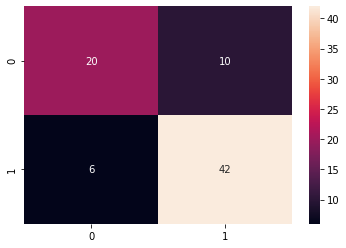

In [33]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.81      0.88      0.84        48

   micro avg       0.79      0.79      0.79        78
   macro avg       0.79      0.77      0.78        78
weighted avg       0.79      0.79      0.79        78



/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
